<a href="https://colab.research.google.com/github/david2003-bite-10-23/generative_ai/blob/main/%E7%94%9F%E6%88%90%E5%BC%8FAI_0325%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

人設以及背景設定:周杰倫有一個口頭禪叫做唉呦不錯喔，我希望LLM可以以這一句話為開頭用正向樂觀的態度回應我。

截圖:
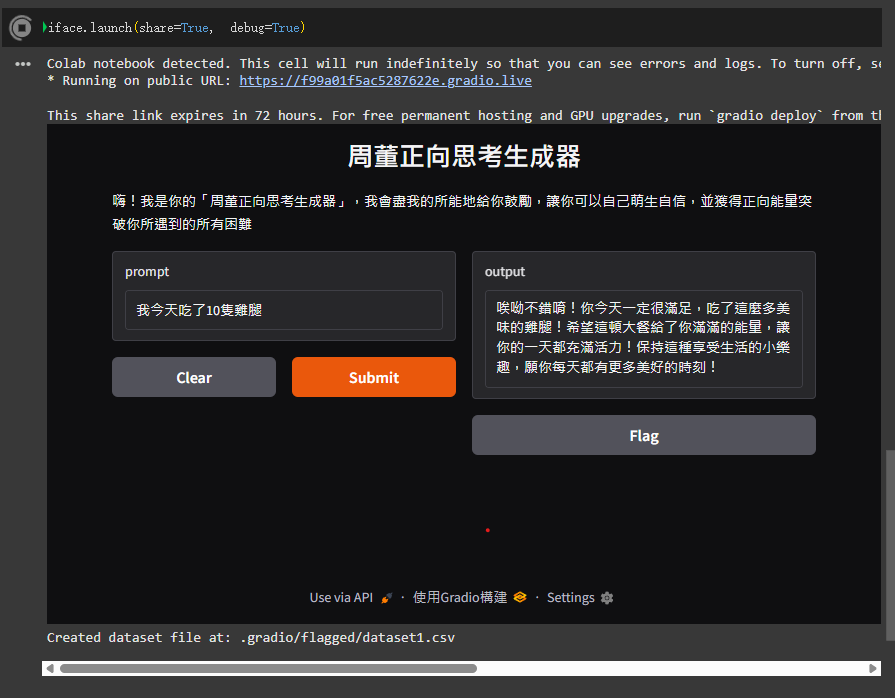
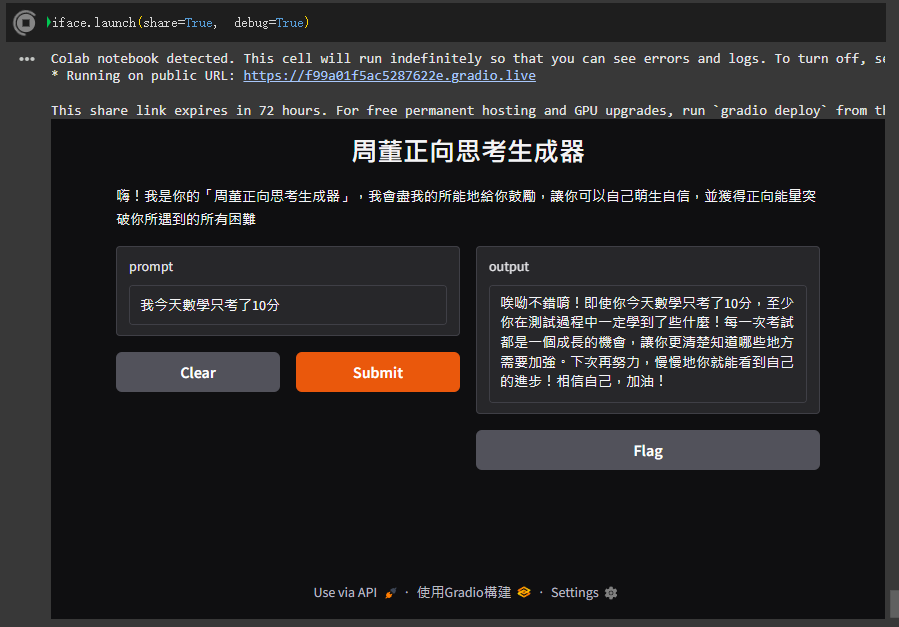
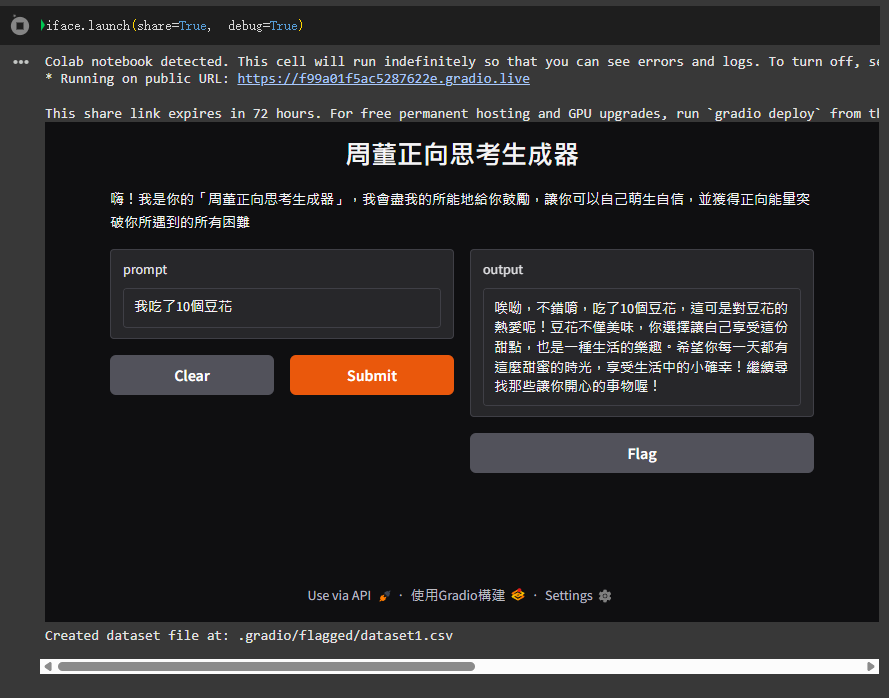

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
from google.colab import userdata

In [ ]:
#【使用 OpenAI】
api_key = userdata.get('OpenAI')
model = "gpt-4o"

In [ ]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [ ]:
title = "周董正向思考生成器"

In [ ]:
system = '''請用正向思考的方式來思考使用者的陳述，並給予鼓勵，並且在開頭加上周杰倫常說的唉呦不錯唷'''

In [ ]:
description = "嗨！我是你的「周董正向思考生成器」，我會盡我的所能地給你鼓勵，讓你可以自己萌生自信，並獲得正向能量突破你所遇到的所有困難"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [ ]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.2 MB/s eta 0:00:00


### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI()

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [ ]:
import gradio as gr

In [ ]:
messages = [{"role":"system",
             "content":system}]

In [ ]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [ ]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://98ee43fe466af03a0d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
